In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'

In [55]:
def round_2(n: float):
    if n == '':
        return
    try:
        return float(np.format_float_positional(float(n), precision=2))
    except Exception:
        print(f'Unable to convert {n} to float')


gdp_df = pd.read_csv('data/gdp_per_capita.csv', converters={'Value': round_2})

gdp_df.info()
gdp_df.head(10)
gdp_df.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6870 entries, 0 to 6869
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6870 non-null   object 
 1   Year             6870 non-null   object 
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 214.8+ KB


,Country or Area,Year,Value,Value Footnotes
6865,Zimbabwe,1992,3054.89,NaN
6866,Zimbabwe,1991,3426.60,NaN
6867,Zimbabwe,1990,3324.35,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [60]:
# 6.

gdp_df_revised = gdp_df \
    .drop(columns=['Value Footnotes']) \
    .dropna(subset=['Value']) \
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

gdp_df_revised.tail()


,Country,Year,GDP_Per_Capita
6863,Zimbabwe,1994,3263.93
6864,Zimbabwe,1993,3033.50
6865,Zimbabwe,1992,3054.89
6866,Zimbabwe,1991,3426.60
6867,Zimbabwe,1990,3324.35


In [89]:
# 7

print(f'The dataframe has {gdp_df_revised.shape[0]} rows')

column_dtypes = gdp_df_revised.dtypes.to_dict()

for column in column_dtypes:
    print(f'The datatype of column {column} is {column_dtypes[column]}')

The dataframe has 6868 rows
The datatype of column Country is object
The datatype of column Year is object
The datatype of column GDP_Per_Capita is float64


The years represented include: 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990.
Some years have fewer observations than others.


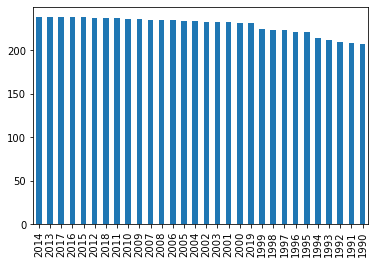

In [108]:
# 8

years_represented = gdp_df_revised.Year.unique()

print(f'The years represented include: {str.join(", ", years_represented)}.')

gdp_df_revised.Year.value_counts().plot(kind='bar')

print('Some years have fewer observations than others.')

In [144]:
# 9

countries = gdp_df_revised.Country.value_counts()

country_stats = countries.describe()

countries_with_less_than_30_observations = DataFrame(countries).query('Country < 30')

print(f'Of the {countries.size} counted, most countries had {int(country_stats["25%"])} observations.')
print(f'However, {countries_with_less_than_30_observations.size} had fewer than that')
print(f'Some had as few as {country_stats["min"]} observations.')
print(f'Those countries with less than {int(country_stats["25%"])} were: {countries_with_less_than_30_observations.index}')
print('The lack of observations for these countries is probably due in part to political instability (eg West Bank and Gaza)')

Of the 238 counted, most countries had 30 observations.
However, 35 had fewer than that
Some had as few as 7.0
Those countries with less than 30 were: Index(['Micronesia', 'Hungary', 'Marshall Islands', 'Turkmenistan', 'Aruba',
       'Slovak Republic', 'Small states', 'Cambodia', 'Estonia',
       'West Bank and Gaza', 'Bosnia and Herzegovina', 'Maldives', 'Latvia',
       'Croatia', 'Kuwait', 'Lithuania', 'Moldova', 'Serbia', 'Montenegro',
       'San Marino', 'Libya', 'CuraÃ§ao', 'Other small states', 'Palau',
       'Liberia', 'Kosovo', 'Qatar', 'Timor-Leste', 'SÃ£o TomÃ© and Principe',
       'Afghanistan', 'Nauru', 'Cayman Islands', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'Djibouti'],
      dtype='object')


In [151]:
# 10

gdp_2014 = gdp_df_revised.set_index('Year').loc['2014']

In [152]:
# 11

gdp_2014.describe()

,GDP_Per_Capita
count,238.000000
mean,19766.710420
std,20983.869499
min,822.610000
25%,4753.115000
50%,12209.385000
75%,26803.607500
max,156514.130000


array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

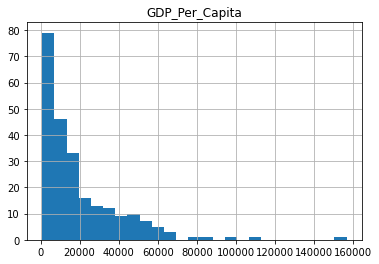

In [154]:
# 12

gdp_2014.hist(bins=25)

In [156]:
# 13

gdp_2014_sorted = gdp_2014.sort_values(by='GDP_Per_Capita')
gdp_2014_top_5 = gdp_2014_sorted.head()
gdp_2014_bottom_5 = gdp_2014_sorted.tail()

In [ ]:
# 14

